<a href="https://colab.research.google.com/github/rajarishiR/programm/blob/main/rishi_made_simple_knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# its a clasiification problem 
data1 = pd.read_csv("/content/ushape.csv")
data1

,X,Y,class
0,0.0316,0.9870,0.0
1,2.1200,-0.0462,1.0
2,0.8820,-0.0758,0.0
3,-0.0551,-0.0373,1.0
4,0.8300,-0.5390,1.0
...,...,...,...
95,1.7000,0.5880,1.0
96,0.2190,-0.6530,1.0
97,0.9530,-0.4200,1.0
98,-1.3200,0.4230,0.0


In [3]:
# spliting the feature and target
x = data1[['X','Y']].values
y = data1['class'].values

In [4]:
#spliting train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

In [5]:
# performing knn
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
# to get the best value of k we use hit and trail from 1 to 20 in genral.
for i in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]:
  knn = KNeighborsClassifier(i)
  knn.fit(x_train,y_train)
  print("K value when i = ",i,"is",knn.score(x_test,y_test))# we use test dataset to find the best val of k

K value when i =  1 is 0.9
K value when i =  2 is 0.9
K value when i =  3 is 0.9
K value when i =  4 is 0.8666666666666667
K value when i =  5 is 0.9
K value when i =  6 is 0.8666666666666667
K value when i =  7 is 0.9
K value when i =  8 is 0.8666666666666667
K value when i =  9 is 0.8666666666666667
K value when i =  10 is 0.8666666666666667
K value when i =  11 is 0.8666666666666667
K value when i =  12 is 0.8666666666666667
K value when i =  13 is 0.8666666666666667
K value when i =  14 is 0.8666666666666667
K value when i =  15 is 0.8333333333333334
K value when i =  16 is 0.8333333333333334
K value when i =  17 is 0.8333333333333334
K value when i =  18 is 0.8333333333333334
K value when i =  19 is 0.7333333333333333
K value when i =  20 is 0.7666666666666667


In [8]:
# from the above code we get to choose the k val with good accuracy
# since 3,5 has the highest accuracy value we choose 3 or 5
knn = KNeighborsClassifier(5)
knn.fit(x_train,y_train)
v = knn.predict(x_train)
v

array([1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0.,
       0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0.,
       1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1.,
       1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       1., 1.])

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


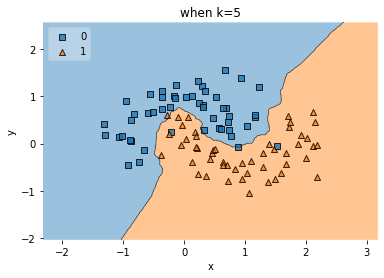

In [13]:
# plotting the decision boundary
z = y.astype(int) # since y needs to be an int not array for decision ploting we converted
from mlxtend.plotting import plot_decision_regions # package for ploting decision boundary
clf = KNeighborsClassifier(n_neighbors=5) # we used 5 cause it has best accuracy and auroc vals.
clf.fit(x,z)
plot_decision_regions(x, z, clf=clf, legend=2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('when k=5')
plt.show()

In [7]:
# now we will be using another evaluation metric called auroc
from sklearn.metrics import roc_auc_score
for i in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]:
  knn = KNeighborsClassifier(i)
  knn.fit(x_train,y_train)
  print("K value when i = ",i,"is",roc_auc_score(y_test, knn.predict_proba(x_test)[:,1])) # we use test data set to find the best val for 

K value when i =  1 is 0.90625
K value when i =  2 is 0.90625
K value when i =  3 is 0.8995535714285714
K value when i =  4 is 0.8995535714285714
K value when i =  5 is 0.8995535714285714
K value when i =  6 is 0.8928571428571428
K value when i =  7 is 0.8861607142857143
K value when i =  8 is 0.9397321428571428
K value when i =  9 is 0.9352678571428572
K value when i =  10 is 0.9308035714285715
K value when i =  11 is 0.9375
K value when i =  12 is 0.9330357142857143
K value when i =  13 is 0.9330357142857143
K value when i =  14 is 0.9486607142857143
K value when i =  15 is 0.9441964285714286
K value when i =  16 is 0.9464285714285714
K value when i =  17 is 0.9352678571428572
K value when i =  18 is 0.9308035714285714
K value when i =  19 is 0.9241071428571429
K value when i =  20 is 0.9263392857142857


In [21]:
# we use cross validation technique to find the best value of k
from sklearn.model_selection import cross_val_score
for i in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]:
  clf = KNeighborsClassifier(n_neighbors=i) 
  clf.fit(x, z) # train the model
  print("cross-validation score for i=",i,'is', np.mean(cross_val_score(clf, x, z, cv=10))) # here we found best val of k using train dataset .

cross-validation score for i= 1 is 0.9199999999999999
cross-validation score for i= 2 is 0.9199999999999999
cross-validation score for i= 3 is 0.95
cross-validation score for i= 4 is 0.9400000000000001
cross-validation score for i= 5 is 0.95
cross-validation score for i= 6 is 0.93
cross-validation score for i= 7 is 0.9400000000000001
cross-validation score for i= 8 is 0.9199999999999999
cross-validation score for i= 9 is 0.93
cross-validation score for i= 10 is 0.9199999999999999
cross-validation score for i= 11 is 0.9199999999999999
cross-validation score for i= 12 is 0.9199999999999999
cross-validation score for i= 13 is 0.93
cross-validation score for i= 14 is 0.9199999999999999
cross-validation score for i= 15 is 0.9199999999999999
cross-validation score for i= 16 is 0.9199999999999999
cross-validation score for i= 17 is 0.93
cross-validation score for i= 18 is 0.93
cross-validation score for i= 19 is 0.93
cross-validation score for i= 20 is 0.93
